# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required.

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas.

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora.


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [1]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 5.0 MB/s eta 0:00:00


In [2]:
pip install pandas


In [3]:
pip install nltk


In [4]:
!pip install lexical-diversity


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 1.7 MB/s eta 0:00:00


In [5]:
!pip install textacy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.0 MB/s eta 0:00:00


In [84]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [85]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [160]:
# Add any additional import statements you need here

from lexical_diversity import lex_div as ld
import csv
import html
import textacy.preprocessing as tprep
import spacy
import regex as re

In [161]:
spacy.load('en_core_web_sm')


In [11]:
#from google.colab import files
#uploaded = files.upload()


In [88]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
# change `data_location` to the location of the folder on your machine.
data_location = "/content/drive/MyDrive/M1 Results"

# These subfolders should still work if you correctly stored the
# data from the Module 1 assignment
twitter_folder = "/content/drive/MyDrive/M1 Results/twitter"
lyrics_folder = "/content/drive/MyDrive/M1 Results/lyrics"

In [163]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens,
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity),
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters.

    """

    # Fill in the correct values here.
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0
    num_characters = sum(len(token) for token in tokens)

    most_common_tokens = Counter(tokens).most_common(num_tokens)

    if verbose :
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"The {num_tokens} most common tokens are:")
        for token, frequency in most_common_tokens:
            print(f"Token: '{token}' - Frequency: {frequency}")
        # print the five most common tokens

    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])


In [164]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 13 most common tokens are:
Token: 'text' - Frequency: 3
Token: 'here' - Frequency: 2
Token: 'example' - Frequency: 2
Token: 'is' - Frequency: 1
Token: 'some' - Frequency: 1
Token: 'with' - Frequency: 1
Token: 'other' - Frequency: 1
Token: 'in' - Frequency: 1
Token: 'this' - Frequency: 1


Q: Why is it beneficial to use assertion statements in your code?

A: Assertion statements are beneficial as they help you catch bugs. They can put many in without having to worry about performance.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well.

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist.




In [165]:
import os
from collections import defaultdict

# Read in the lyrics data

# d[artist][title] = “the song lyrics as a string”
lyrics = defaultdict(lambda: defaultdict(str))

# Get the directory location
data_location= '/content/drive/MyDrive/M1 Results/'
lyrics_folder = '/content/drive/MyDrive/M1 Results/lyrics' # removed data_location from lyrics_folder

# Get all the subfolders in directory.
directory = os.path.join(data_location, lyrics_folder) # using os.path.join to build the path

# Get all the subfolders in directory.
artist_subfolders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]


# Get all the files in each of the subfolders
for artist in artist_subfolders:
    for filename in os.listdir(os.path.join(directory, artist)):
        f = os.path.join(directory, artist, filename)
        # checking if it is a file
        if os.path.isfile(f):
            with open(f) as file:
                title = file.readline().strip()
                lyrics[artist][title] = file.read().strip()

In [166]:
print(lyrics["robyn"].keys())


dict_keys(['"Bumpy Ride"', '"In My Heart"', '"You\'ve Got That Something"', '"Do You Know (What It Takes)"', '"The Last Time"', '"Just Another Girlfriend"', '"Don\'t Want You Back"', '"Do You Really Want Me (Show Respect)"', '"How"', '"Here We Go"', '"Where Did Our Love Go"', '"Robyn Is Here"', '"I Wish"', '"Show Me Love"', '"Play"', '"My Only Reason"', '"Underneath The Heart"', '"Electric"', '"My Truth"', '"Main Thing"', '"Healthy Love"', '"Monday Morning"', '"Giving You Back"', '"88 Days"', '"Long Gone"', '"Not On The Inside"', '"Universal Woman"', '"Keep This Fire Burning"', '"Don\'t Stop The Music"', '"O Baby"', '"Blow My Mind"', '"Should Have Known"', '"Moonlight"', '"Breakdown Intermission"', '"Ain\'t No Thing"', '"Big City"', '"Psycho"', '"Still Your Girl"', '"Curriculum Vitae"', '"Konichiwa Bitches"', '"Cobrastyle"', '"Handle Me"', '"Bum Like You"', '"Be Mine!"', '"With Every Heartbeat"', '"Who\'s That Girl"', '"Bionic Woman"', '"Crash And Burn Girl"', '"Robotboy"', '"Eclipse"'

In [167]:
for artist in artist_subfolders:
    for filename in os.listdir(os.path.join(directory, artist)):
        f = os.path.join(directory, artist, filename)
        # checking if it is a file
        if os.path.isfile(f):
            with open(f) as file:
                title = file.readline().strip()
                lyrics[artist][title] = file.read().strip()
                print(f"Artist: {artist}, Title: {title}")  # Print the title and artist


Artist: robyn, Title: "Bumpy Ride"
Artist: robyn, Title: "In My Heart"
Artist: robyn, Title: "In My Heart"
Artist: robyn, Title: "You've Got That Something"
Artist: robyn, Title: "Do You Know (What It Takes)"
Artist: robyn, Title: "The Last Time"
Artist: robyn, Title: "Just Another Girlfriend"
Artist: robyn, Title: "Just Another Girlfriend"
Artist: robyn, Title: "Don't Want You Back"
Artist: robyn, Title: "Don't Want You Back"
Artist: robyn, Title: "Do You Really Want Me (Show Respect)"
Artist: robyn, Title: "How"
Artist: robyn, Title: "Here We Go"
Artist: robyn, Title: "Where Did Our Love Go"
Artist: robyn, Title: "Where Did Our Love Go"
Artist: robyn, Title: "Robyn Is Here"
Artist: robyn, Title: "I Wish"
Artist: robyn, Title: "Show Me Love"
Artist: robyn, Title: "Play"
Artist: robyn, Title: "My Only Reason"
Artist: robyn, Title: "Underneath The Heart"
Artist: robyn, Title: "Electric"
Artist: robyn, Title: "My Truth"
Artist: robyn, Title: "Main Thing"
Artist: robyn, Title: "Healthy Lo

In [168]:
for artist in artist_subfolders:
    for filename in os.listdir(os.path.join(directory, artist)):
        f = os.path.join(directory, artist, filename)
        if os.path.isfile(f):
            with open(f) as file:
                first_line = file.readline().strip()
                if '88 Days' in first_line:
                    print(f"Found '88 Days' in: {filename} for {artist}")


Found '88 Days' in: robyn_88days.txt for robyn


In [169]:
for artist in artist_subfolders:
    for filename in os.listdir(os.path.join(directory, artist)):
        f = os.path.join(directory, artist, filename)
        if os.path.isfile(f):
            with open(f) as file:
                title = file.readline().strip().strip('"')  # Remove extra quotes
                lyrics[artist][title] = file.read().strip()
                print(f"Stored title: '{title}' for artist '{artist}'")


Stored title: 'Bumpy Ride' for artist 'robyn'
Stored title: 'In My Heart' for artist 'robyn'
Stored title: 'In My Heart' for artist 'robyn'
Stored title: 'You've Got That Something' for artist 'robyn'
Stored title: 'Do You Know (What It Takes)' for artist 'robyn'
Stored title: 'The Last Time' for artist 'robyn'
Stored title: 'Just Another Girlfriend' for artist 'robyn'
Stored title: 'Just Another Girlfriend' for artist 'robyn'
Stored title: 'Don't Want You Back' for artist 'robyn'
Stored title: 'Don't Want You Back' for artist 'robyn'
Stored title: 'Do You Really Want Me (Show Respect)' for artist 'robyn'
Stored title: 'How' for artist 'robyn'
Stored title: 'Here We Go' for artist 'robyn'
Stored title: 'Where Did Our Love Go' for artist 'robyn'
Stored title: 'Where Did Our Love Go' for artist 'robyn'
Stored title: 'Robyn Is Here' for artist 'robyn'
Stored title: 'I Wish' for artist 'robyn'
Stored title: 'Show Me Love' for artist 'robyn'
Stored title: 'Play' for artist 'robyn'
Stored ti

In [232]:
print(lyrics["robyn"].get('88 Days', 'Title not found'))


I light a candle in the morning 
To signify that your still on my mind
Darkness arrived without a warning 
It brought me down
But I know the world just keeps on turning

I wish that I could turn you on 
Like a switch in my kitchen 
Right before dawn
88 days seems so long
I believe in you and me
But it's so hard to trust
Something you just can't see, still I've got

[CHORUS]
88 days 'til the sun
And while you're gone
I've got so much work inside my heart to be done, I've got
88 days 'til the sun
I`ve got to get my spirit ready
For when the springtime comes
88 days 'til the sun

Zip up my thickest jacket 
I miss the green and the light you gave to me
Prepare to get my feet wet
Halogen's on bright when 2 pm is like 2 in the night, it ain't right
So what's the message in this song
That the pain doesn't mean that you can't carry on
Still 88 days seem so long
A meditation, a revelation
But it's so hard to trust
Something you just can't see, still I've got

[Chorus (x1)]

88 days 'til the sun

In [170]:
print(len(lyrics['cher']))
print(len(lyrics['robyn']))

626
186


In [171]:
# Create lyrics Pandas Dataframe for Cleaning
artists = ['cher', 'robyn']

for i, artist in enumerate(artists):
    if i == 0:
        lyrics_df = pd.DataFrame(lyrics[artist].items(), columns=['title', 'lyrics'])
        lyrics_df['artist'] = artist
    lyrics_dfi = pd.DataFrame(lyrics[artist].items(), columns=['title', 'lyrics'])
    lyrics_dfi['artist'] = artist
    lyrics_df = pd.concat([lyrics_df, lyrics_dfi], ignore_index=True)

lyrics_df = lyrics_df.fillna(value='')
lyrics_df

,title,lyrics,artist
0,"""All I Really Want To Do""",Now I ain't lookin'\nTo compete with you\nBeat...,cher
1,"""I Go To Sleep""",When I look up from my pillow\nI dream you are...,cher
2,"""Needles And Pins""","Saw him today\nI saw his face, it was the face...",cher
3,"""Don't Think Twice""","It ain't no use to sit and wonder why, baby\nI...",cher
4,"""Dream Baby""",I found the boy for me\nHe's my dream baby\n\n...,cher
...,...,...,...
1433,Honey,"No, you're not gonna get what you need\nBaby, ...",robyn
1434,Between The Lines,Even reading in between the lines\n\nEvery day...,robyn
1435,Beach 2K20,(So you wanna go out?\nHow you gonna get there...,robyn
1436,Ever Again,"Come on, let's have it out\nGo 'head and try a...",robyn


In [204]:
# Read in the twitter data


import sys # import the sys module

maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

# d[artist][title] = “the song lyrics as a string”
desc = defaultdict(list)
#
artists = ['cher', 'robyn']
filename = ['/content/drive/MyDrive/M1 Results/twitter/cher_followers.txt', '/content/drive/MyDrive/M1 Results/twitter/robynkonichiwa_followers_data.txt']


# Get the directory location
twitter_folder = '/content/drive/MyDrive/M1 Results/twitter'
directory = data_location + twitter_folder

# Get all the files in each of the subfolders
for i, artist in enumerate(artists):
    f = os.path.join(directory, filename[i])
    # checking if it is a file
    if os.path.isfile(f):
        with open(f, encoding="utf8") as f:
            reader = csv.DictReader(f, delimiter="\t") # read rows into a dictionary format
            for row in reader: # read a row as {column1: value1, column2: value2,...}
                for (k,v) in row.items(): # go over each column name and value
                    if k == "description":
                        # append the value into the appropriate list
                        # based on column name k
                        desc[artist].append(v)

In [173]:
for i, artist in enumerate(artists):
    if i == 0:

        twitter_df = pd.DataFrame.from_dict(desc[artist], orient='columns')
        twitter_df.rename({0:"description"}, inplace=True,  axis=1)
        twitter_df['artist'] = artist
    twitter_dfi = pd.DataFrame.from_dict(desc[artist])
    twitter_dfi.rename({0:"description"}, inplace=True,  axis=1)
    twitter_dfi['artist'] = artist
    twitter_df = pd.concat([twitter_df, twitter_dfi], ignore_index=True)


twitter_df = twitter_df.fillna(value="")
twitter_df

,artist,description
0,robyn,I love chill •Facebook / Instagram / SoundClou...
1,robyn,"books, movies, music, nature & TV shows. OG Sw..."
2,robyn,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...
3,robyn,This Twitter profile is full of sarcasm and ra...
4,robyn,Flora Youssef - Blogger & Founder Posting revi...
...,...,...
351834,robyn,"singer of songs, type 1 diabetic, tired $jakel..."
351835,robyn,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...
351836,robyn,A year to change a life is still a year ✨😌
351837,robyn,Head of Consumer - Mango. Made in Melbourne. R...


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame.



In [175]:
punctuation = set(punctuation) # speeds up comparison

In [174]:
def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # Remove Puncuation
    def remove_punc(s):
        return ''.join(ch for ch in s if ch not in punctuation)
    text = remove_punc(text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()



def normalize(text):
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    return text

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in sw]

In [176]:
# create your clean twitter data here
twitter_df['clean_description'] = twitter_df['description'].map(clean)
# Normalize Text
twitter_df['normalized_description'] = twitter_df['clean_description'].map(normalize)
# Tokenized Data
twitter_df['tokenized'] = twitter_df['normalized_description'].map(tokenize)
# Remove Stop Words
twitter_df['tokens'] = twitter_df['tokenized'].map(remove_stop)

twitter_df

,artist,description,clean_description,normalized_description,tokenized,tokens
0,robyn,I love chill •Facebook / Instagram / SoundClou...,I love chill •Facebook Instagram SoundCloud An...,I love chill •Facebook Instagram SoundCloud An...,"[I, love, chill, Facebook, Instagram, SoundClo...","[love, chill, Facebook, Instagram, SoundCloud,..."
1,robyn,"books, movies, music, nature & TV shows. OG Sw...",books movies music nature TV shows OG Sweetee ...,books movies music nature TV shows OG Sweetee ...,"[books, movies, music, nature, TV, shows, OG, ...","[books, movies, music, nature, TV, shows, OG, ..."
2,robyn,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...,Amauteur en herbe 🌱 juriste en paille 🤡 Ami de...,Amauteur en herbe 🌱 juriste en paille 🤡 Ami de...,"[Amauteur, en, herbe, juriste, en, paille, Ami...","[Amauteur, en, herbe, juriste, en, paille, Ami..."
3,robyn,This Twitter profile is full of sarcasm and ra...,This Twitter profile is full of sarcasm and ra...,This Twitter profile is full of sarcasm and ra...,"[This, Twitter, profile, is, full, of, sarcasm...","[Twitter, profile, full, sarcasm, rants, occas..."
4,robyn,Flora Youssef - Blogger & Founder Posting revi...,Flora Youssef Blogger Founder Posting review a...,Flora Youssef Blogger Founder Posting review a...,"[Flora, Youssef, Blogger, Founder, Posting, re...","[Flora, Youssef, Blogger, Founder, Posting, re..."
...,...,...,...,...,...,...
351834,robyn,"singer of songs, type 1 diabetic, tired $jakel...",singer of songs type 1 diabetic tired jakelgil...,singer of songs type 1 diabetic tired jakelgil...,"[singer, of, songs, type, diabetic, tired, jak...","[singer, songs, type, diabetic, tired, jakelgi..."
351835,robyn,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...,Dadx2 ConArch Photographer DK stemgrønnest grø...,Dadx2 ConArch Photographer DK stemgrønnest grø...,"[Dadx2, ConArch, Photographer, DK, stemgrønnes...","[Dadx2, ConArch, Photographer, DK, stemgrønnes..."
351836,robyn,A year to change a life is still a year ✨😌,A year to change a life is still a year ✨😌,A year to change a life is still a year ✨😌,"[A, year, to, change, a, life, is, still, a, y...","[year, change, life, still, year]"
351837,robyn,Head of Consumer - Mango. Made in Melbourne. R...,Head of Consumer Mango Made in Melbourne Rambl...,Head of Consumer Mango Made in Melbourne Rambl...,"[Head, of, Consumer, Mango, Made, in, Melbourn...","[Head, Consumer, Mango, Made, Melbourne, Rambl..."


In [177]:
# Save Data for Later Use
twitter_df.to_pickle("twitter_df.pkl")
# twitter_df = pd.read_pickle("twitter_df.pkl")

In [178]:
# create your clean lyrics data here
lyrics_df['clean_lyrics'] = lyrics_df['lyrics'].map(clean)
# Normalize Text
lyrics_df['normalized_lyrics'] = lyrics_df['clean_lyrics'] .map(normalize)
# Tokenized Data
lyrics_df['tokenized'] = lyrics_df['normalized_lyrics'].map(tokenize)
# Remove Stop Words
lyrics_df['tokens'] = lyrics_df['tokenized'].map(remove_stop)

lyrics_df

,title,lyrics,artist,clean_lyrics,normalized_lyrics,tokenized,tokens
0,"""All I Really Want To Do""",Now I ain't lookin'\nTo compete with you\nBeat...,cher,Now I aint lookin To compete with you Beat on ...,Now I aint lookin To compete with you Beat on ...,"[Now, I, aint, lookin, To, compete, with, you,...","[aint, lookin, compete, Beat, cheat, mistreat,..."
1,"""I Go To Sleep""",When I look up from my pillow\nI dream you are...,cher,When I look up from my pillow I dream you are ...,When I look up from my pillow I dream you are ...,"[When, I, look, up, from, my, pillow, I, dream...","[look, pillow, dream, Though, far, away, know,..."
2,"""Needles And Pins""","Saw him today\nI saw his face, it was the face...",cher,Saw him today I saw his face it was the face I...,Saw him today I saw his face it was the face I...,"[Saw, him, today, I, saw, his, face, it, was, ...","[Saw, today, saw, face, face, love, knew, run,..."
3,"""Don't Think Twice""","It ain't no use to sit and wonder why, baby\nI...",cher,It aint no use to sit and wonder why baby Ifn ...,It aint no use to sit and wonder why baby Ifn ...,"[It, aint, no, use, to, sit, and, wonder, why,...","[aint, use, sit, wonder, baby, Ifn, dont, know..."
4,"""Dream Baby""",I found the boy for me\nHe's my dream baby\n\n...,cher,I found the boy for me Hes my dream baby He do...,I found the boy for me Hes my dream baby He do...,"[I, found, the, boy, for, me, Hes, my, dream, ...","[found, boy, Hes, dream, baby, doesnt, almost,..."
...,...,...,...,...,...,...,...
1433,Honey,"No, you're not gonna get what you need\nBaby, ...",robyn,No youre not gonna get what you need Baby I ha...,No youre not gonna get what you need Baby I ha...,"[No, youre, not, gonna, get, what, you, need, ...","[youre, gonna, get, need, Baby, want, Come, ge..."
1434,Between The Lines,Even reading in between the lines\n\nEvery day...,robyn,Even reading in between the lines Every day yo...,Even reading in between the lines Every day yo...,"[Even, reading, in, between, the, lines, Every...","[Even, reading, lines, Every, day, hit, phone,..."
1435,Beach 2K20,(So you wanna go out?\nHow you gonna get there...,robyn,So you wanna go out How you gonna get there OK...,So you wanna go out How you gonna get there OK...,"[So, you, wanna, go, out, How, you, gonna, get...","[wanna, go, gonna, get, OK, call, someone, Alr..."
1436,Ever Again,"Come on, let's have it out\nGo 'head and try a...",robyn,Come on lets have it out Go head and try a lit...,Come on lets have it out Go head and try a lit...,"[Come, on, lets, have, it, out, Go, head, and,...","[Come, lets, Go, head, try, little, crazy, don..."


In [179]:
# Save Data for Later Use
lyrics_df.to_pickle("lyrics_df.pkl")
# lyrics_df = pd.read_pickle("lyrics_df.pkl")

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls).

In [180]:
# calls to descriptive_stats here

# Helper Function
def flatten_and_descriptive_stats(list_of_lists):
    wordlist = [i for s in list_of_lists for i in s]
    return descriptive_stats(wordlist)



print("\nLyrics Data for Cher:\n")
flatten_and_descriptive_stats(lyrics_df.loc[lyrics_df['artist']=='cher']["tokens"])


Lyrics Data for Cher:

There are 139172 tokens in the data.
There are 4329 unique tokens in the data.
There are 667820 characters in the data.
The lexical diversity is 0.031 in the data.
The 139172 most common tokens are:
Token: 'love' - Frequency: 3272
Token: 'Im' - Frequency: 2036
Token: 'know' - Frequency: 1892
Token: 'dont' - Frequency: 1252
Token: 'see' - Frequency: 1136
Token: 'time' - Frequency: 1104
Token: 'youre' - Frequency: 1020
Token: 'go' - Frequency: 1016
Token: 'heart' - Frequency: 992
Token: 'one' - Frequency: 940
Token: 'baby' - Frequency: 912
Token: 'never' - Frequency: 876
Token: 'way' - Frequency: 868
Token: 'got' - Frequency: 860
Token: 'gonna' - Frequency: 832
Token: 'like' - Frequency: 788
Token: 'Oh' - Frequency: 772
Token: 'come' - Frequency: 768
Token: 'man' - Frequency: 752
Token: 'cant' - Frequency: 748
Token: 'take' - Frequency: 696
Token: 'feel' - Frequency: 692
Token: 'Ive' - Frequency: 692
Token: 'want' - Frequency: 684
Token: 'away' - Frequency: 680
To

[139172, 4329, 0.03110539476331446, 667820]

In [184]:
print("\nLyrics Data for Robyn:\n")
flatten_and_descriptive_stats(lyrics_df[lyrics_df['artist']=='robyn']["tokens"])


Lyrics Data for Robyn:

There are 25824 tokens in the data.
There are 2403 unique tokens in the data.
There are 123902 characters in the data.
The lexical diversity is 0.093 in the data.
The 25824 most common tokens are:
Token: 'Im' - Frequency: 508
Token: 'know' - Frequency: 470
Token: 'love' - Frequency: 428
Token: 'got' - Frequency: 414
Token: 'dont' - Frequency: 378
Token: 'like' - Frequency: 366
Token: 'baby' - Frequency: 298
Token: 'never' - Frequency: 244
Token: 'get' - Frequency: 240
Token: 'want' - Frequency: 218
Token: 'youre' - Frequency: 214
Token: 'gonna' - Frequency: 210
Token: 'right' - Frequency: 210
Token: 'cant' - Frequency: 196
Token: 'time' - Frequency: 196
Token: 'go' - Frequency: 160
Token: 'beat' - Frequency: 154
Token: 'dance' - Frequency: 152
Token: 'back' - Frequency: 148
Token: 'Ill' - Frequency: 146
Token: 'say' - Frequency: 140
Token: 'killing' - Frequency: 132
Token: 'still' - Frequency: 130
Token: 'keep' - Frequency: 128
Token: 'better' - Frequency: 128


[25824, 2403, 0.09305297397769517, 123902]

In [187]:
print(twitter_df.loc[twitter_df['description']=='cher']['description'].head())  # Check Cher's descriptions
print(twitter_df.loc[twitter_df['description']=='robyn']['description'].head())  # Check Robyn's descriptions


Series([], Name: description, dtype: object)
Series([], Name: description, dtype: object)


In [202]:
print(twitter_df['description'].sample(5))  # Print 5 random descriptions to inspect the content


130672                                                     
227588                                                     
222199                         Legs From here to home world
317753    My life has been, is and will be an original s...
167202                                                     
Name: description, dtype: object


In [196]:
import nltk
from nltk.tokenize import word_tokenize

# Example tokenization
def flatten_and_descriptive_stats(description_column):
    tokens = word_tokenize(' '.join(description_column.dropna().values))
    print(f"There are {len(tokens)} tokens in the data.")
    # Continue processing...


In [210]:
print("\nTwitter Description Data for Cher:\n")
flatten_and_descriptive_stats(twitter_df.loc[twitter_df['description']=='cher']["tokens"]) # Changed 'artist' to 'description'


Twitter Description Data for Cher:

There are 0 tokens in the data.


In [211]:
print("\nTwitter Description Data for Robyn:\n")
flatten_and_descriptive_stats(twitter_df.loc[twitter_df['description']=='robyn']["tokens"]) # Changed 'artist' to 'description'


Twitter Description Data for Robyn:

There are 0 tokens in the data.


Q: How do you think the "top 5 words" would be different if we left stopwords in the data?

A:

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs?

A:



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist.
1. For each artist, a histogram of song lengths (in terms of number of tokens)

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [212]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions?


In [213]:
# Your code here
twitter_df['emoji'] = twitter_df['description'].map(emoji.distinct_emoji_list)

In [214]:
# Helper Function
def flatten_and_descriptive_emoji_stats(list_of_lists):
    wordlist = [i for s in list_of_lists for i in s]
    return descriptive_stats(wordlist, 10)

print("\nTwitter emoji Data for Robyn:\n")
flatten_and_descriptive_emoji_stats(twitter_df.loc[twitter_df['artist']=='robyn']["emoji"])



Twitter emoji Data for Robyn:

There are 64530 tokens in the data.
There are 2379 unique tokens in the data.
There are 98878 characters in the data.
The lexical diversity is 0.037 in the data.
The 64530 most common tokens are:
Token: '🏳️‍🌈' - Frequency: 3071
Token: '❤️' - Frequency: 2088
Token: '♥' - Frequency: 1544
Token: '✨' - Frequency: 1510
Token: '🌈' - Frequency: 1265
Token: '❤' - Frequency: 1108
Token: '💙' - Frequency: 679
Token: '🎶' - Frequency: 623
Token: '💜' - Frequency: 622
Token: '🇺🇸' - Frequency: 572
Token: '🖤' - Frequency: 512
Token: '🇬🇧' - Frequency: 450
Token: '🎧' - Frequency: 436
Token: '💚' - Frequency: 424
Token: '💛' - Frequency: 410
Token: '🐶' - Frequency: 377
Token: '💕' - Frequency: 372
Token: '✌️' - Frequency: 367
Token: '💖' - Frequency: 358
Token: '⚡' - Frequency: 353
Token: '🇨🇦' - Frequency: 352
Token: '🌱' - Frequency: 344
Token: '🇲🇽' - Frequency: 335
Token: '⚽' - Frequency: 332
Token: '✌' - Frequency: 330
Token: '📚' - Frequency: 326
Token: '🎮' - Frequency: 318
T

[64530, 2379, 0.03686657368665737, 98878]

In [215]:
print("\nTwitter emoji Data for Robyn:\n")
flatten_and_descriptive_emoji_stats(twitter_df.loc[twitter_df['description']==artist]["emoji"]) # Use the variable artist instead of the string 'artist'


Twitter emoji Data for Robyn:

There are 0 tokens in the data.
There are 0 unique tokens in the data.
There are 0 characters in the data.
The lexical diversity is 0.000 in the data.
The 0 most common tokens are:


[0, 0, 0, 0]

In [216]:
print("\nTwitter emoji Data for Cher:\n")
flatten_and_descriptive_emoji_stats(twitter_df.loc[twitter_df['description']=='cher']["emoji"]) # Changed 'name' to 'description' assuming 'description' is the correct column to filter on


Twitter emoji Data for Cher:

There are 0 tokens in the data.
There are 0 unique tokens in the data.
There are 0 characters in the data.
The lexical diversity is 0.000 in the data.
The 0 most common tokens are:


[0, 0, 0, 0]

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions?


In [217]:
# Your code here
def hashtag_tokenizer(text):
    return re.findall(r"#(\w+)", text)

# Tokenized Hashtag Data
twitter_df['hashtags'] = twitter_df['description'].map(hashtag_tokenizer)

In [218]:
print("\nTwitter emoji Data for Cher:\n")
flatten_and_descriptive_emoji_stats(twitter_df.loc[twitter_df['description']=='cher']["hashtags"]) # Changed 'name' to 'description' assuming 'description' is the column containing the artist's name


Twitter emoji Data for Cher:

There are 0 tokens in the data.
There are 0 unique tokens in the data.
There are 0 characters in the data.
The lexical diversity is 0.000 in the data.
The 0 most common tokens are:


[0, 0, 0, 0]

In [219]:
print("\nTwitter emoji Data for Robyn:\n")
# The DataFrame does not have a column named 'artist'. Using 'description' instead
flatten_and_descriptive_emoji_stats(twitter_df.loc[twitter_df['description']=='robyn']["hashtags"])


Twitter emoji Data for Robyn:

There are 0 tokens in the data.
There are 0 unique tokens in the data.
There are 0 characters in the data.
The lexical diversity is 0.000 in the data.
The 0 most common tokens are:


[0, 0, 0, 0]

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [222]:
# Your code
def title_clean_tokenize(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # Remove Puncuation
    def remove_punc(s):
        return ''.join(ch for ch in s if ch not in punctuation)
    text = remove_punc(text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)


# Tokenized Title Data
lyrics_df['clean_title'] = lyrics_df['title'].map(title_clean_tokenize)

In [225]:
# Example tokenization
def flatten_and_descriptive_stats(description_column):
    tokens = []
    for item in description_column.dropna().values: # Iterate over each item in the column
        if isinstance(item, list): # Check if the item is a list
            tokens.extend(item) # If it's a list, extend the tokens list
        else:
            tokens.extend(word_tokenize(item)) # Otherwise, tokenize the item and extend

    print(f"There are {len(tokens)} tokens in the data.")
    # Continue processing...

In [226]:
print("\nTitle Data for Robyn:\n")
flatten_and_descriptive_stats(lyrics_df.loc[lyrics_df['artist']=='robyn']["clean_title"])


Title Data for Robyn:

There are 512 tokens in the data.


In [227]:
print("\nTitle Data for Cher:\n")
flatten_and_descriptive_stats(lyrics_df.loc[lyrics_df['artist']=='cher']["clean_title"])



Title Data for Cher:

There are 4620 tokens in the data.


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out.


,length
artist,
Artist 1,"Axes(0.125,0.11;0.775x0.77)"
Artist 2,"Axes(0.125,0.11;0.775x0.77)"


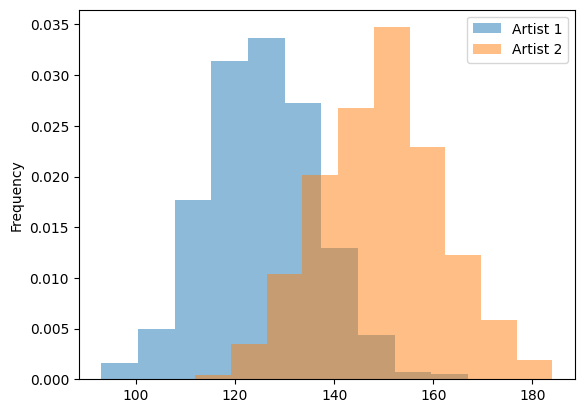

In [228]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting.

Q: What does the regular expression `'\s+'` match on?

A: It matches any whitespace character and matches the previous token.


In [229]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) :
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [230]:
# Your lyric length comparison chart here.
lyrics_df['length'] = lyrics_df['tokens'].map(len)


,length
artist,
cher,"Axes(0.125,0.11;0.775x0.77)"
robyn,"Axes(0.125,0.11;0.775x0.77)"


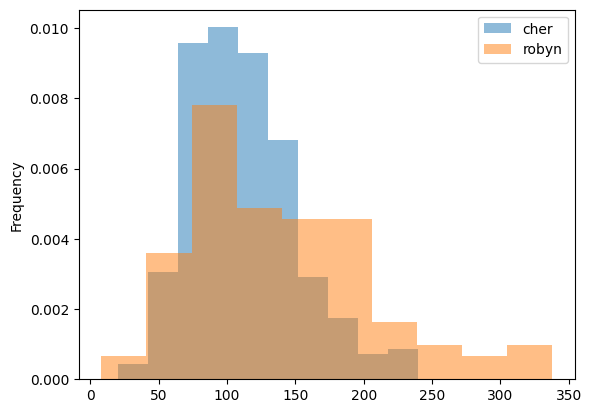

In [234]:
lyrics_df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)
